# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'ES=F'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : True,
    'use_cache' : True,
    'sma' : 200,
    'band' : 3.0
}

Run Strategy

In [5]:
s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [6]:
s.tlog.tail(10)

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
45,2003-04-22,911.37,2004-08-06,1063.97,152.60,169080.77,1108,1169282.31,LONG,^GSPC
46,2004-11-04,1161.67,2007-08-15,1406.70,245.03,248705.36,1015,1417987.67,LONG,^GSPC
47,2007-09-18,1519.78,2007-11-19,1433.27,-86.51,-81232.90,939,1336754.77,LONG,^GSPC
48,2009-06-11,944.89,2010-05-26,1067.95,123.06,175360.41,1425,1512115.18,LONG,^GSPC
49,2010-10-05,1160.75,2011-08-04,1200.07,39.32,51548.45,1311,1563663.63,LONG,^GSPC
50,2012-01-18,1308.04,2015-08-21,1970.89,662.85,797408.52,1203,2361072.15,LONG,^GSPC
51,2016-04-13,2082.42,2018-10-24,2656.10,573.68,652848.04,1138,3013920.19,LONG,^GSPC
52,2019-03-21,2854.88,2020-02-28,2954.22,99.34,105201.15,1059,3119121.34,LONG,^GSPC
53,2020-06-03,3122.87,2022-02-22,4304.76,1181.89,1184253.43,1002,4303374.77,LONG,^GSPC
54,2022-03-29,4631.60,2022-04-22,4271.78,-359.82,-334992.71,931,3968382.06,LONG,^GSPC


In [7]:
s.dbal.tail(10)

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2022-12-15,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-16,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-19,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-20,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-21,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-22,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-23,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-27,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-
2022-12-28,3978382.06,3978382.06,3978382.06,0,3978382.06,1.00,-


Display all available stats

In [8]:
pf.print_full(s.stats)

start                                                   1928-10-16
end                                                     2022-12-29
beginning_balance                                            10000
ending_balance                                          3978382.06
total_net_profit                                        3968382.06
gross_profit                                            4447202.39
gross_loss                                              -478820.33
profit_factor                                                 9.29
return_on_initial_capital                                 39683.82
annual_return_rate                                            6.56
trading_period                           94 years 2 months 13 days
pct_time_in_market                                           66.77
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [9]:
benchmark = pf.Benchmark(symbol, s.capital, s.start, s.end, use_adj=s.options['use_adj'])
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

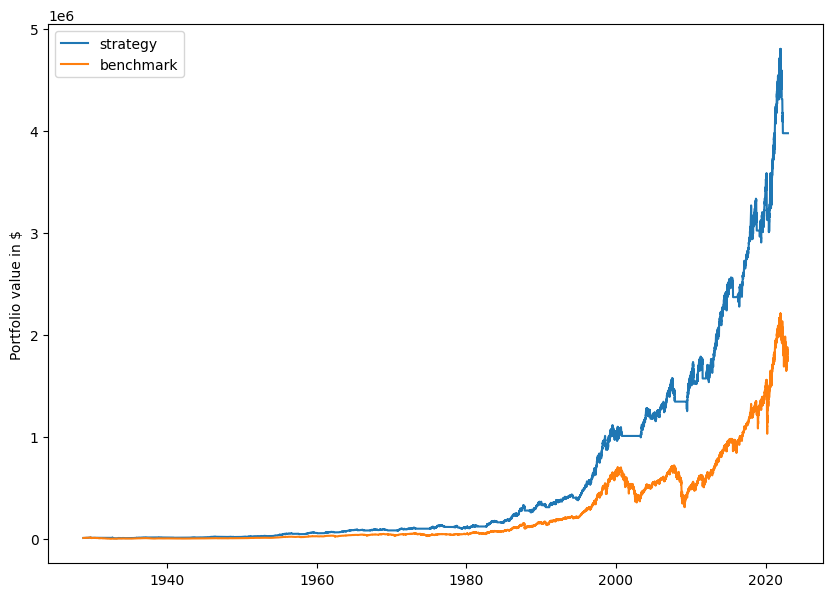

In [10]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

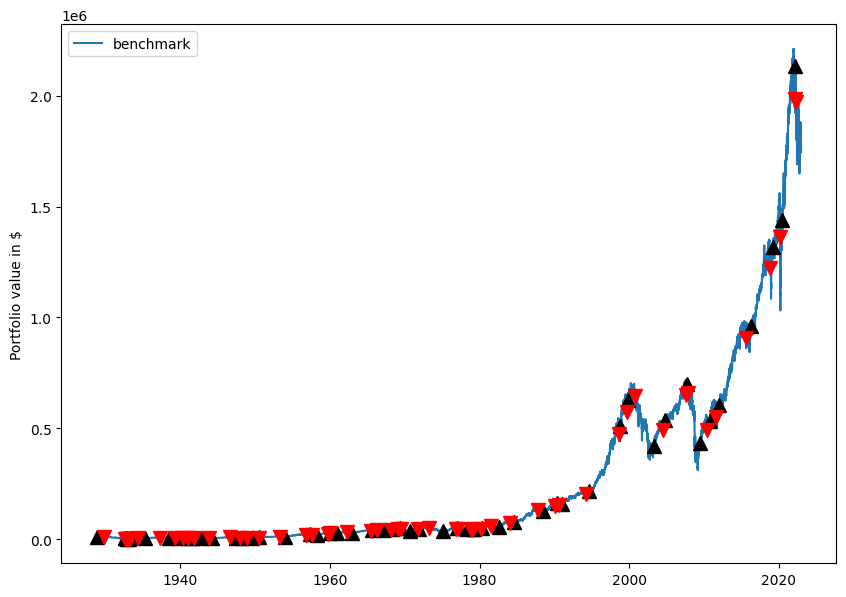

In [11]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

In [12]:
print('trading period:  {} to {}'.format(s.stats['start'], s.stats['end']))
df = pf.summary(s.stats, benchmark.stats, metrics=pf.currency_metrics)
df

trading period:  1928-10-16 to 2022-12-29


,strategy,benchmark
beginning_balance,"$10,000.00","$10,000.00"
ending_balance,"$3,978,382.06","$1,774,519.33"
total_net_profit,"$3,968,382.06","$1,764,519.33"
gross_profit,"$4,447,202.39","$1,764,519.33"
gross_loss,"-$478,820.33",$0.00


Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,6.56,5.65
max_closed_out_drawdown,-57.79,-86.16
annualized_return_over_max_drawdown,0.11,0.07
best_month,27.00,61.49
worst_month,-27.06,-42.17
sharpe_ratio,0.58,0.38
sortino_ratio,0.59,0.48
monthly_std,3.36,5.34
annual_std,13.80,20.00


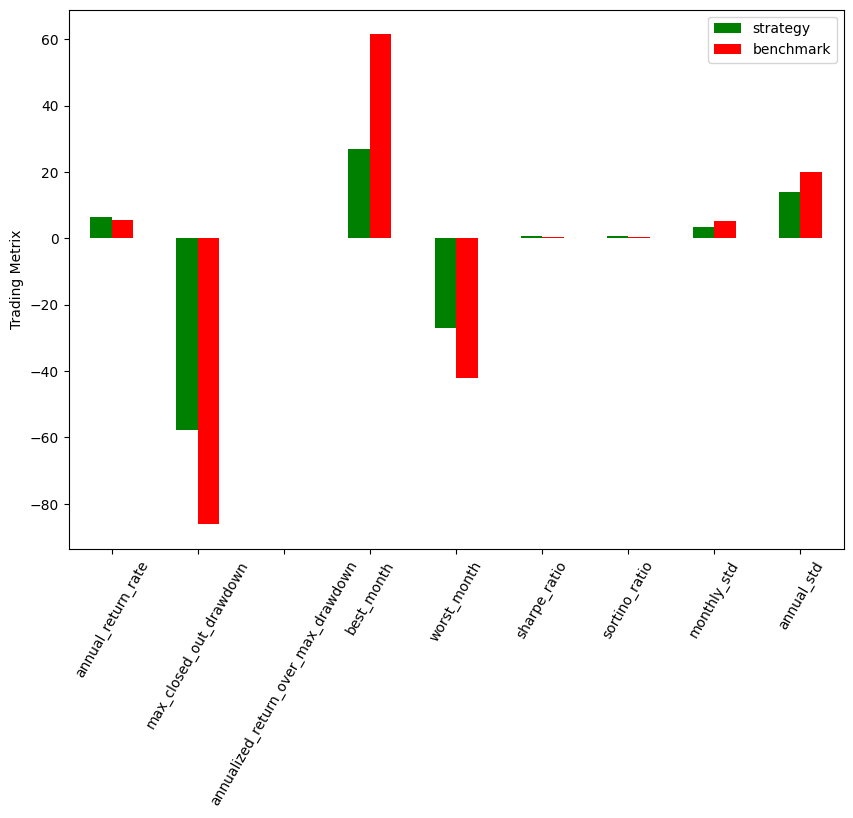

In [13]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Print the raw transaction log

In [14]:
pd.set_option('display.max_rows', len(s.rlog))
s.rlog

,date,seq_num,price,shares,entry_exit,direction,symbol
0,1928-10-16,0,21.72,460,entry,LONG,^GSPC
1,1929-10-24,1,25.75,460,exit,LONG,^GSPC
2,1932-08-10,2,7.65,1549,entry,LONG,^GSPC
3,1932-08-12,3,7.00,1549,exit,LONG,^GSPC
4,1932-08-16,4,7.68,1412,entry,LONG,^GSPC
5,1932-10-10,5,6.42,1412,exit,LONG,^GSPC
6,1932-10-14,6,7.13,1271,entry,LONG,^GSPC
7,1932-11-02,7,6.52,1271,exit,LONG,^GSPC
8,1932-11-07,8,7.24,1145,entry,LONG,^GSPC
9,1932-12-02,9,6.47,1145,exit,LONG,^GSPC
